In [1]:
from pyspark.sql import SparkSession
spark = ( 
    SparkSession
    .builder
    .config("spark.master", "local[*]")
    .config("spark.driver.memory", "120g")
    .config("spark.driver.maxResultSize", "0")
    .enableHiveSupport()
    .getOrCreate()
)

In [2]:
import socket
port = spark.sparkContext.uiWebUrl.split(":")[-1]
hostname = socket.gethostname()
print(f"https://{hostname}/jupyter/user/stevengs/proxy/{port}/jobs/")

https://epyc.astro.washington.edu/jupyter/user/stevengs/proxy/4050/jobs/


In [3]:
import axs

In [9]:
catalog = axs.AxsCatalog(spark)
top_hat_fits = catalog.load("6_4_20_stevengs_top_hat_fits_r_band").drop_duplicates(subset=["ps1_objid"])
skew_normal_fits = catalog.load("6_4_20_stevengs_skew_normal_fits_r_band").drop_duplicates(subset=["ps1_objid"])
columns = top_hat_fits.columns

In [10]:
# rename columns to dis-ambiguate them
for col in columns:
    top_hat_fits = top_hat_fits.withColumnRenamed(col, f"{col}_top_hat")
    skew_normal_fits = skew_normal_fits.withColumnRenamed(col, f"{col}_skew_normal")

In [11]:
joined_df = top_hat_fits.join(
    skew_normal_fits, 
    top_hat_fits['ps1_objid_top_hat'] == skew_normal_fits['ps1_objid_skew_normal'], 
    how="inner"
)

In [12]:
# drop duplicates after join
cols_to_keep = ['model_error_in_dip_r', 'model_error_around_dip_r', 'model_error_r', 'fit_r']
for col in [c for c in columns if c not in cols_to_keep]:
    joined_df = joined_df.drop(joined_df[f'{col}_top_hat'])
    joined_df = joined_df.withColumnRenamed(f'{col}_skew_normal', col)

In [13]:
joined_df.columns

['fit_r_top_hat',
 'model_error_in_dip_r_top_hat',
 'model_error_around_dip_r_top_hat',
 'model_error_r_top_hat',
 'ps1_objid',
 'ra',
 'dec',
 'zone',
 'mjd_r',
 'mag_r',
 'magerr_r',
 'dip',
 'window_r',
 'fit_r_skew_normal',
 'dip_window_r',
 'model_error_in_dip_r_skew_normal',
 'around_dip_window_r',
 'model_error_around_dip_r_skew_normal',
 'model_error_r_skew_normal']

In [14]:
catalog.save_axs_table(joined_df, "6_4_20_stevengs_top_hat_and_skew_normal_fits_r_band")

In [15]:
joined_df_saved = catalog.load("6_4_20_stevengs_top_hat_and_skew_normal_fits_r_band")
lcs = joined_df_saved.head(100)
lcs[0].asDict().keys()

dict_keys(['fit_r_top_hat', 'model_error_in_dip_r_top_hat', 'model_error_around_dip_r_top_hat', 'model_error_r_top_hat', 'ps1_objid', 'ra', 'dec', 'zone', 'mjd_r', 'mag_r', 'magerr_r', 'dip', 'window_r', 'fit_r_skew_normal', 'dip_window_r', 'model_error_in_dip_r_skew_normal', 'around_dip_window_r', 'model_error_around_dip_r_skew_normal', 'model_error_r_skew_normal'])

In [22]:
joined_df_saved.count()

55345

In [16]:
from models import top_hat, skew_normal
from fit_utils import plot_model, plot_data
import matplotlib.pyplot as plt
import numpy as np


    id                             = 88492547744402750
    dip.significance               = 5.271639347076416
    model_error_in_dip_r_top_hat   = 1.0672962665557861
    model_error_in_dip_r_skew_norm = 1.073169231414795
    


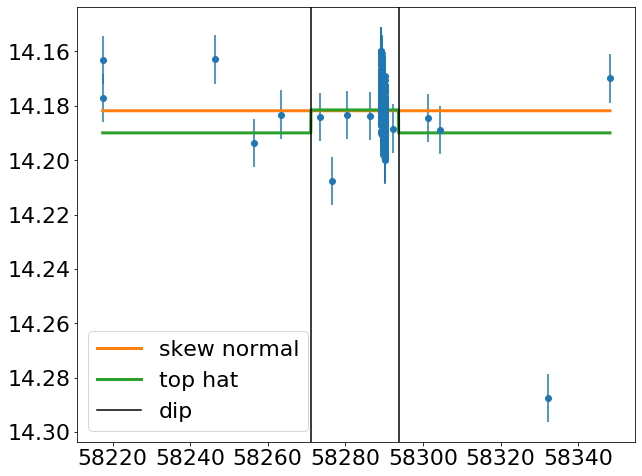


    id                             = 88492616365368548
    dip.significance               = 5.615800857543945
    model_error_in_dip_r_top_hat   = 5.920839309692383
    model_error_in_dip_r_skew_norm = 5.172573089599609
    


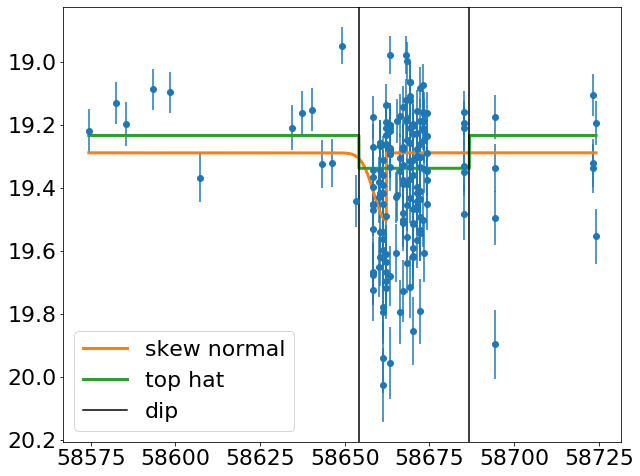


    id                             = 88492647084704897
    dip.significance               = 6.9895734786987305
    model_error_in_dip_r_top_hat   = 4.371512413024902
    model_error_in_dip_r_skew_norm = 4.382753372192383
    


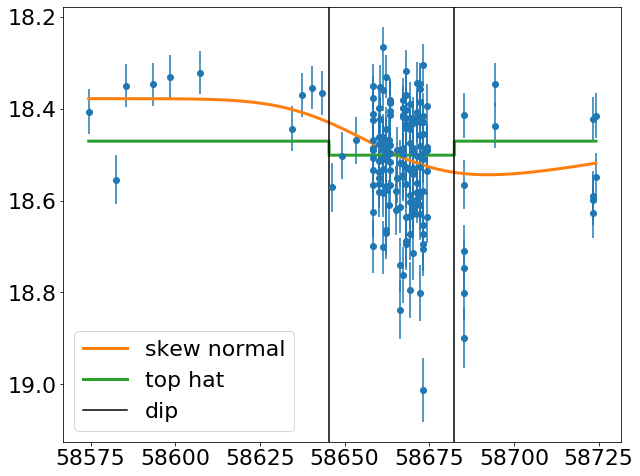


    id                             = 88502659022770783
    dip.significance               = 6.68698263168335
    model_error_in_dip_r_top_hat   = 2.638293743133545
    model_error_in_dip_r_skew_norm = 2.628312349319458
    


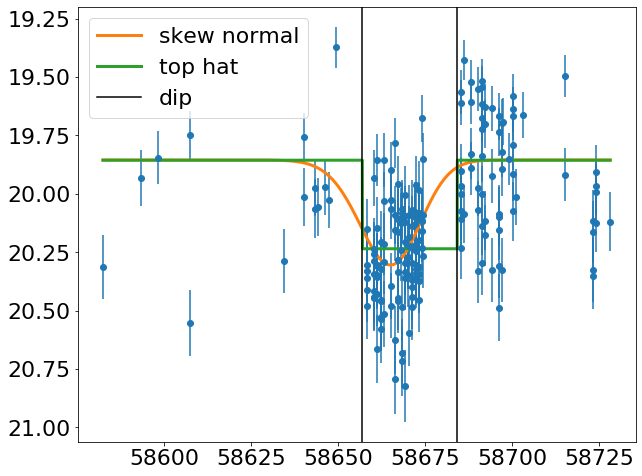


    id                             = 88492659738601532
    dip.significance               = 5.087092399597168
    model_error_in_dip_r_top_hat   = 9.930861473083496
    model_error_in_dip_r_skew_norm = 10.051019668579102
    


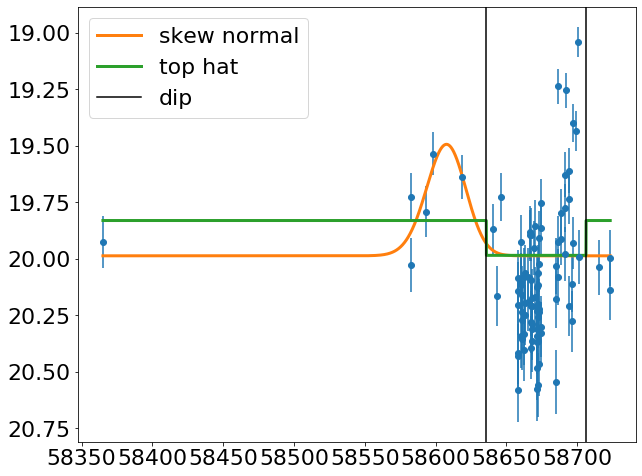


    id                             = 88492663915891913
    dip.significance               = 11.116536140441895
    model_error_in_dip_r_top_hat   = 36.42333984375
    model_error_in_dip_r_skew_norm = 35.92458724975586
    


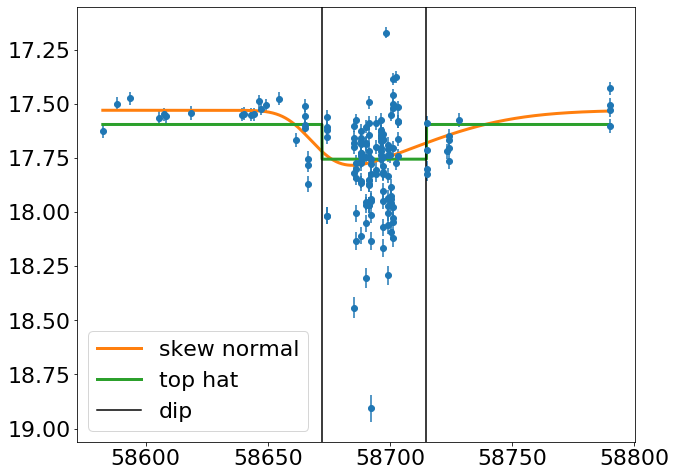


    id                             = 88482666521354217
    dip.significance               = 9.322916030883789
    model_error_in_dip_r_top_hat   = 8.30439281463623
    model_error_in_dip_r_skew_norm = 7.974637031555176
    


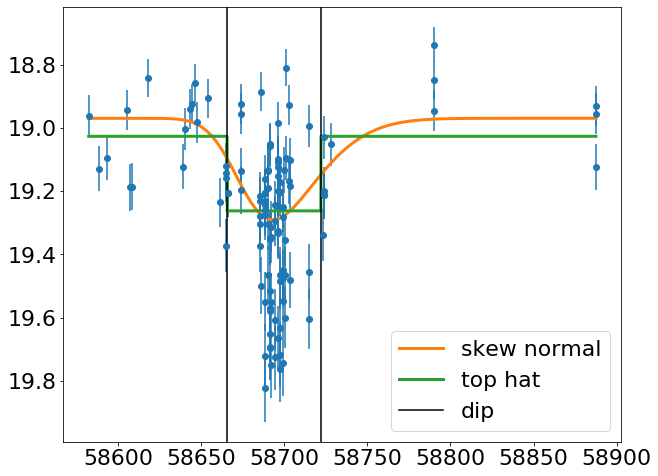


    id                             = 88492666564832288
    dip.significance               = 6.443432807922363
    model_error_in_dip_r_top_hat   = 6.09336519241333
    model_error_in_dip_r_skew_norm = 6.091823101043701
    


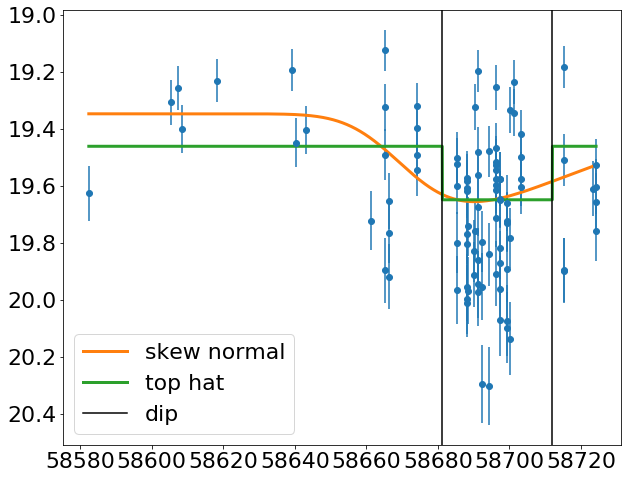


    id                             = 88482668612068589
    dip.significance               = 5.3833088874816895
    model_error_in_dip_r_top_hat   = 14.664260864257812
    model_error_in_dip_r_skew_norm = 14.75692081451416
    


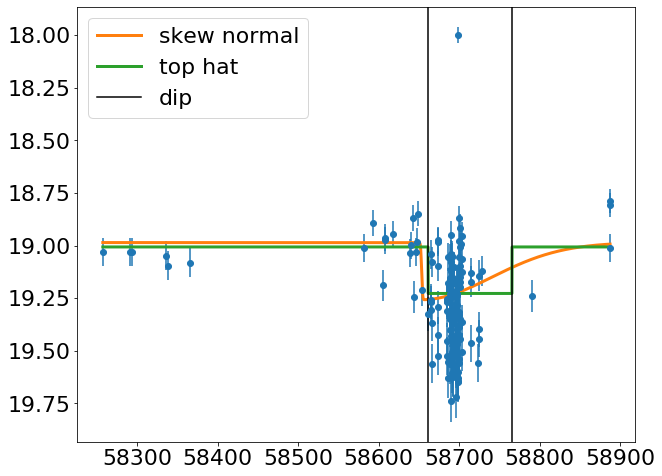


    id                             = 88492669158445025
    dip.significance               = 9.646919250488281
    model_error_in_dip_r_top_hat   = 5.069893836975098
    model_error_in_dip_r_skew_norm = 5.025902271270752
    


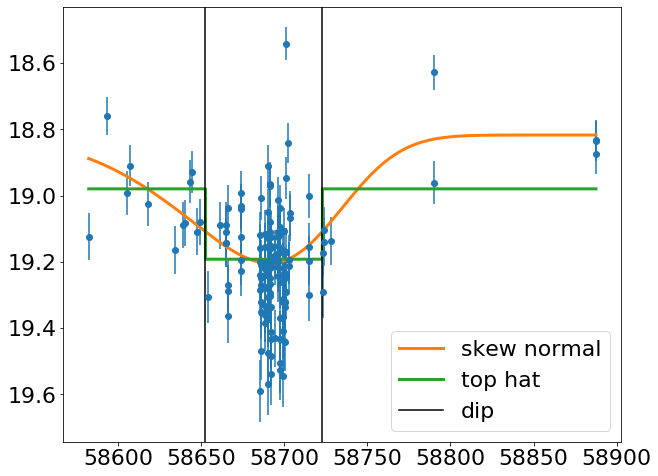


    id                             = 88492669615080907
    dip.significance               = 14.3342924118042
    model_error_in_dip_r_top_hat   = 7.9121246337890625
    model_error_in_dip_r_skew_norm = 7.604620456695557
    


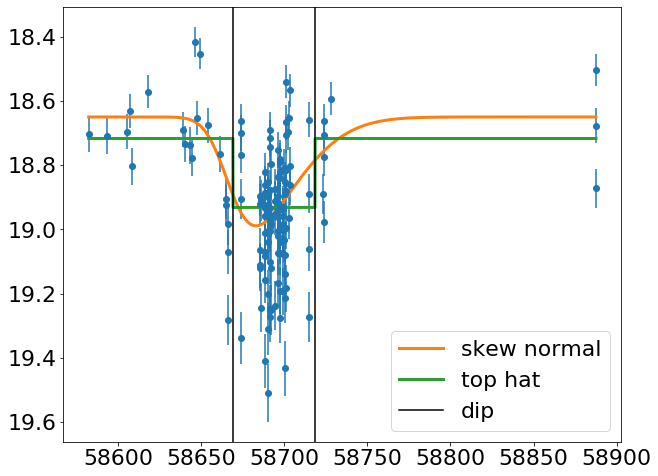


    id                             = 88492673795972637
    dip.significance               = 7.257857799530029
    model_error_in_dip_r_top_hat   = 4.3105926513671875
    model_error_in_dip_r_skew_norm = 4.3158488273620605
    


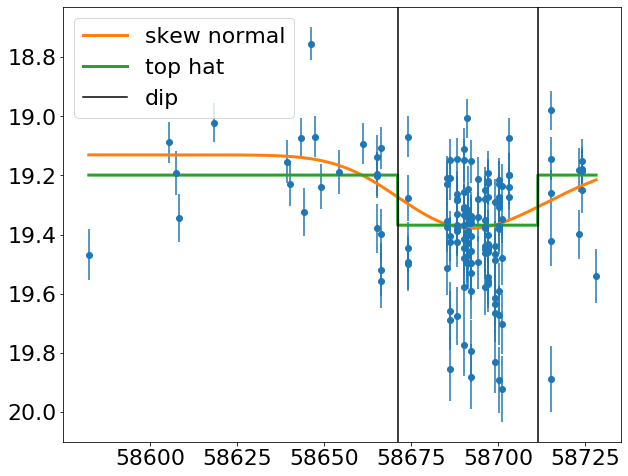


    id                             = 88502673801453146
    dip.significance               = 17.949939727783203
    model_error_in_dip_r_top_hat   = 9.49540901184082
    model_error_in_dip_r_skew_norm = 9.207915306091309
    


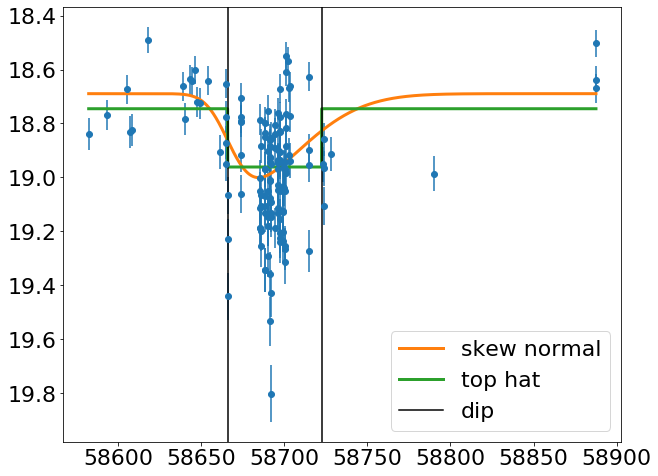


    id                             = 88482682424412899
    dip.significance               = 6.989425182342529
    model_error_in_dip_r_top_hat   = 3.2814812660217285
    model_error_in_dip_r_skew_norm = 3.3032753467559814
    


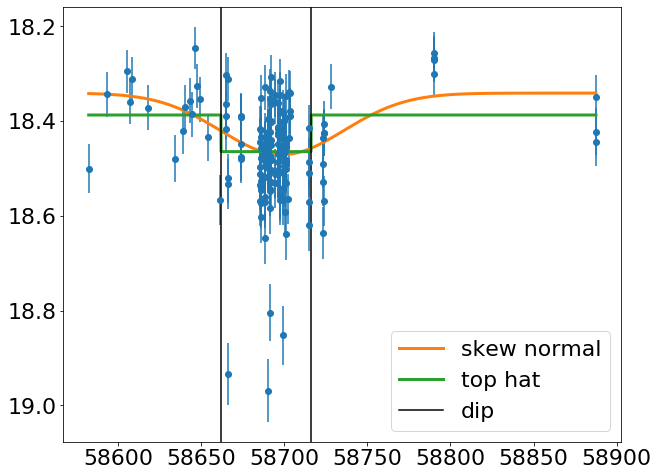


    id                             = 88482682646863548
    dip.significance               = 8.238317489624023
    model_error_in_dip_r_top_hat   = 3.8459179401397705
    model_error_in_dip_r_skew_norm = 3.475379467010498
    


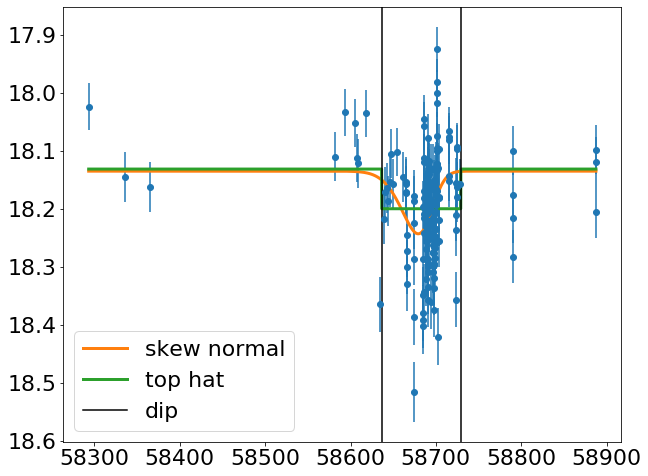


    id                             = 88482687642258312
    dip.significance               = 5.880974292755127
    model_error_in_dip_r_top_hat   = 3.767853021621704
    model_error_in_dip_r_skew_norm = 3.8060598373413086
    


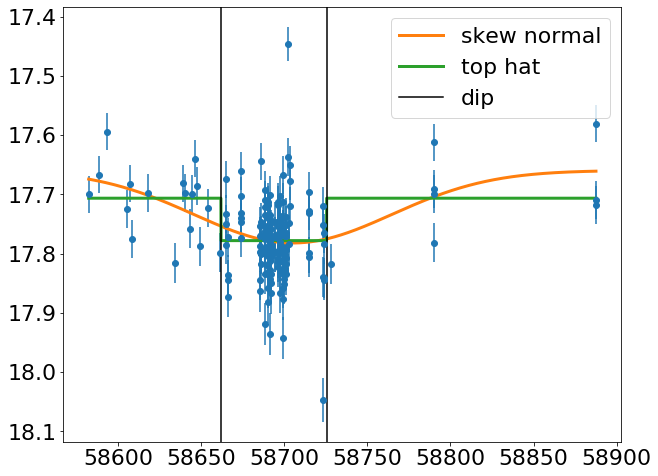


    id                             = 88502690131480939
    dip.significance               = 7.4202775955200195
    model_error_in_dip_r_top_hat   = 3.492249011993408
    model_error_in_dip_r_skew_norm = 3.489837408065796
    


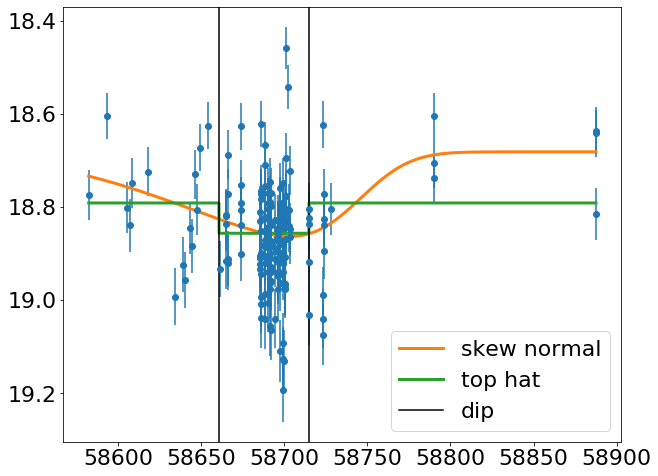


    id                             = 88492690296242180
    dip.significance               = 13.184401512145996
    model_error_in_dip_r_top_hat   = 8.87993049621582
    model_error_in_dip_r_skew_norm = 8.36751651763916
    


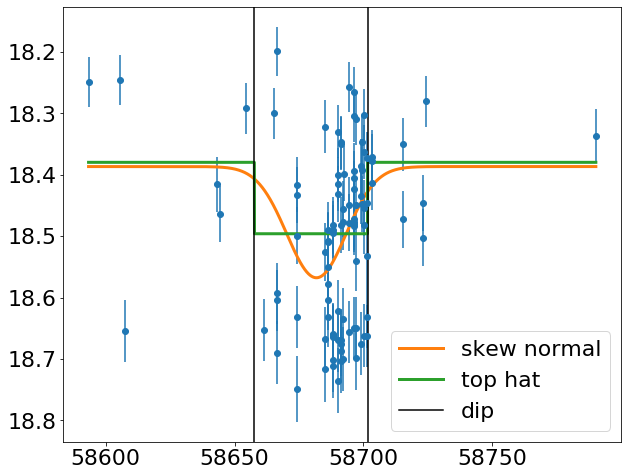


    id                             = 88482691414771202
    dip.significance               = 8.210476875305176
    model_error_in_dip_r_top_hat   = 5.01629638671875
    model_error_in_dip_r_skew_norm = 4.896394729614258
    


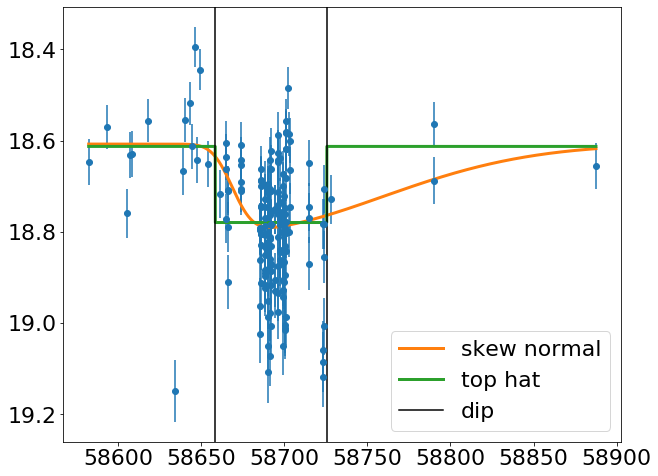


    id                             = 88502694158662097
    dip.significance               = 9.791020393371582
    model_error_in_dip_r_top_hat   = 14.780088424682617
    model_error_in_dip_r_skew_norm = 14.708000183105469
    


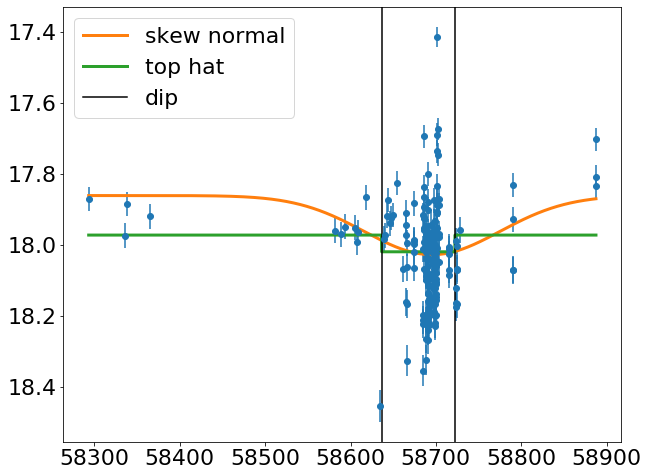


    id                             = 88492699928739241
    dip.significance               = 6.970447540283203
    model_error_in_dip_r_top_hat   = 5.86141300201416
    model_error_in_dip_r_skew_norm = 5.554227828979492
    


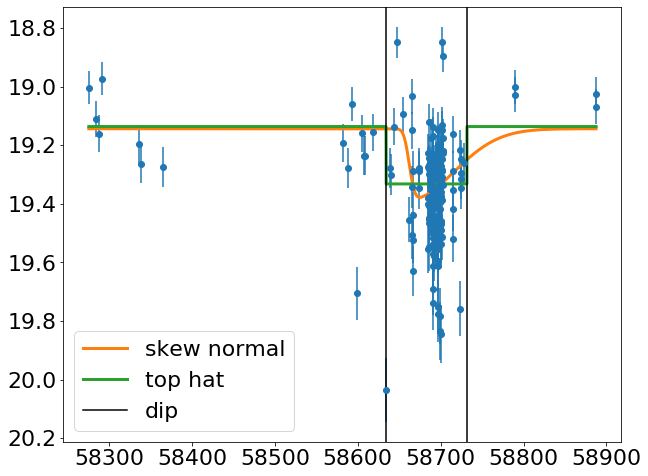


    id                             = 88492702186114490
    dip.significance               = 9.168951988220215
    model_error_in_dip_r_top_hat   = 8.24820327758789
    model_error_in_dip_r_skew_norm = 8.363142013549805
    


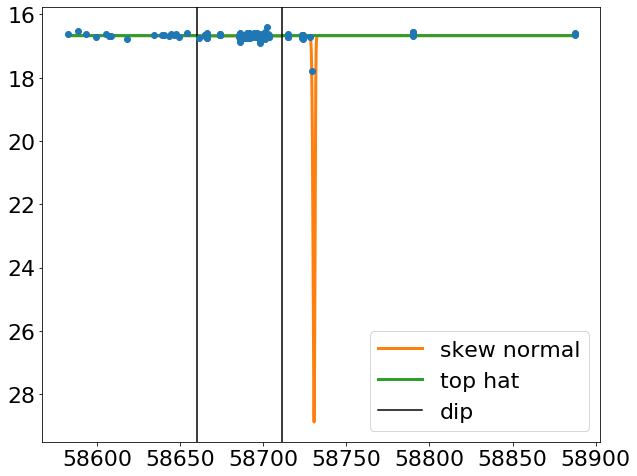


    id                             = 88492709016199343
    dip.significance               = 5.331943035125732
    model_error_in_dip_r_top_hat   = 4.173590183258057
    model_error_in_dip_r_skew_norm = 4.234684467315674
    


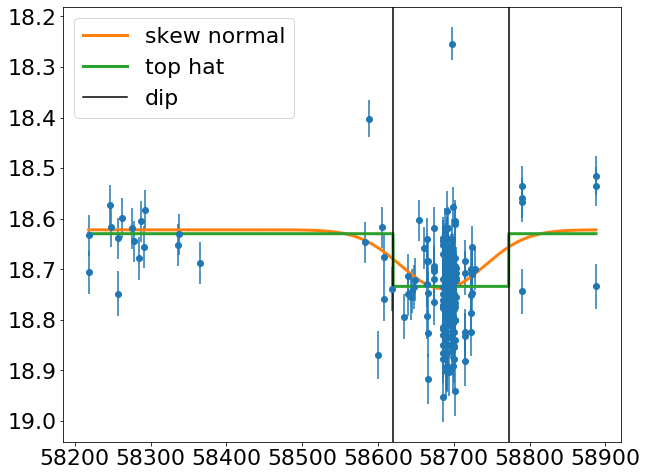


    id                             = 88492713824724465
    dip.significance               = 7.237175464630127
    model_error_in_dip_r_top_hat   = 4.946592807769775
    model_error_in_dip_r_skew_norm = 4.976455211639404
    


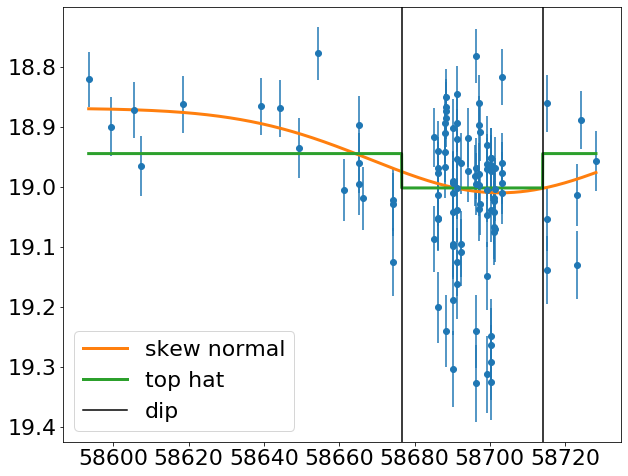


    id                             = 88492718713546952
    dip.significance               = 5.182382106781006
    model_error_in_dip_r_top_hat   = 3.0549733638763428
    model_error_in_dip_r_skew_norm = 2.9511380195617676
    


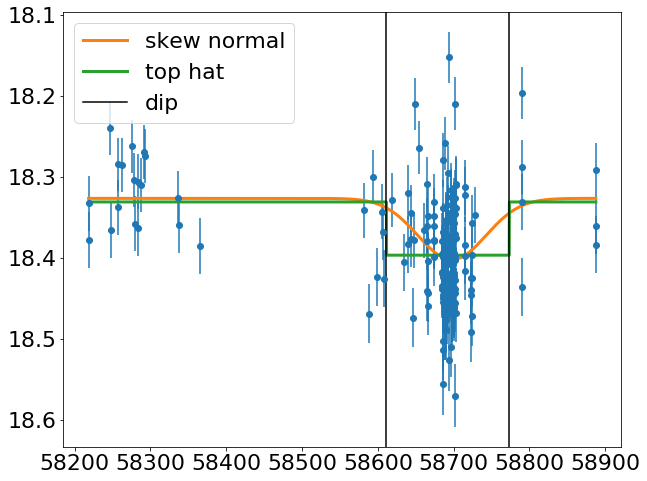


    id                             = 88482721752616942
    dip.significance               = 6.893002033233643
    model_error_in_dip_r_top_hat   = 7.43160343170166
    model_error_in_dip_r_skew_norm = 7.215473175048828
    


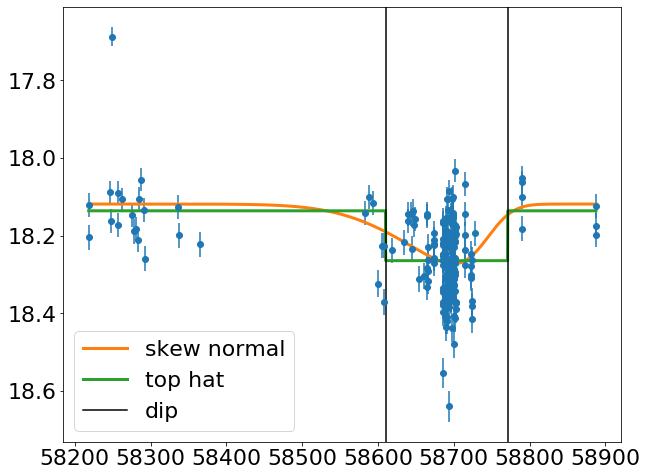


    id                             = 88492796423697711
    dip.significance               = 5.454684734344482
    model_error_in_dip_r_top_hat   = 5.669920444488525
    model_error_in_dip_r_skew_norm = 5.6336283683776855
    


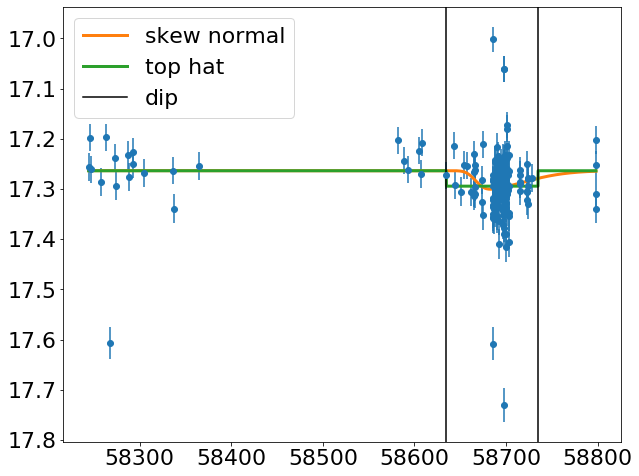


    id                             = 88482800038107984
    dip.significance               = 5.494955539703369
    model_error_in_dip_r_top_hat   = 2.9986414909362793
    model_error_in_dip_r_skew_norm = 3.1273348331451416
    


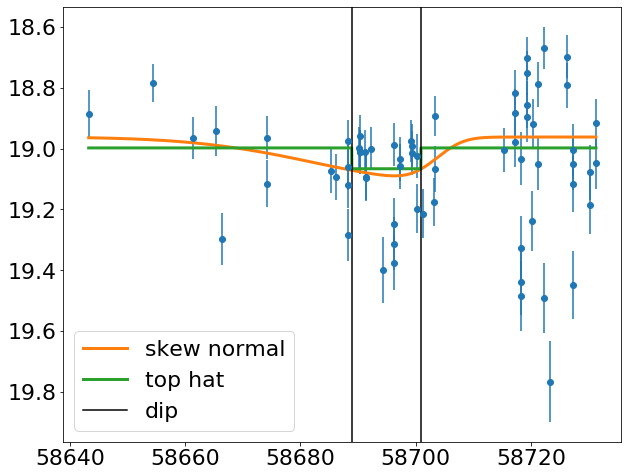


    id                             = 88492804092270474
    dip.significance               = 7.799563884735107
    model_error_in_dip_r_top_hat   = 3.750274419784546
    model_error_in_dip_r_skew_norm = 2.830803632736206
    


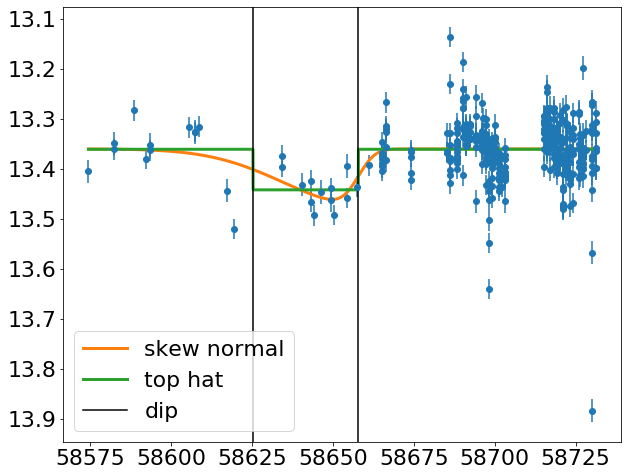


    id                             = 96462584079462177
    dip.significance               = 5.151669502258301
    model_error_in_dip_r_top_hat   = 1.1242260932922363
    model_error_in_dip_r_skew_norm = 1.0929548740386963
    


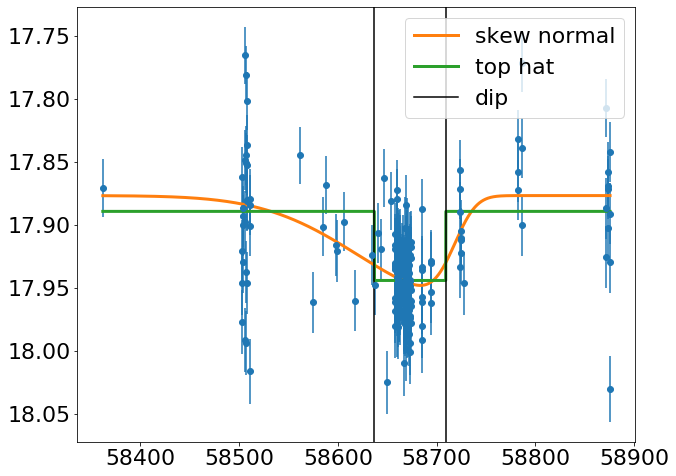


    id                             = 96462746029390905
    dip.significance               = 7.860629558563232
    model_error_in_dip_r_top_hat   = -10.271974563598633
    model_error_in_dip_r_skew_norm = -0.002727132523432374
    


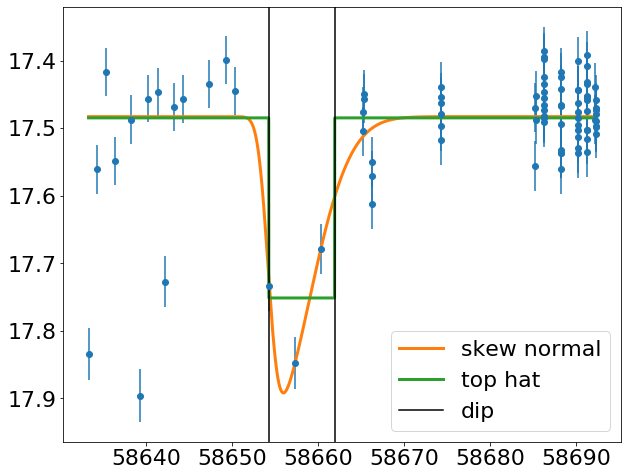


    id                             = 96462746702517075
    dip.significance               = 7.7805328369140625
    model_error_in_dip_r_top_hat   = 4.2392144203186035
    model_error_in_dip_r_skew_norm = 4.117107391357422
    


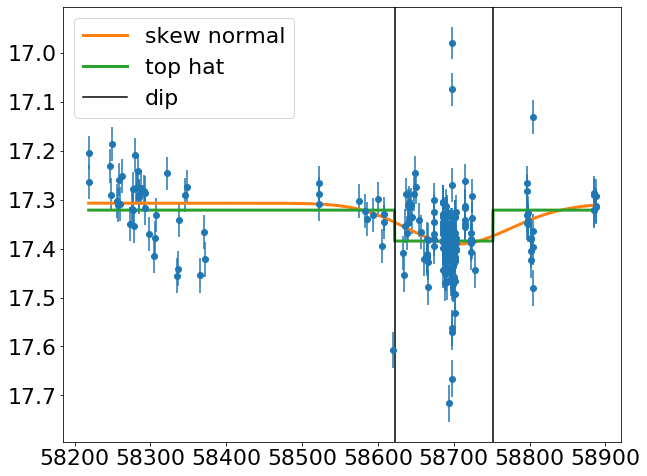


    id                             = 96472762573590147
    dip.significance               = 11.460854530334473
    model_error_in_dip_r_top_hat   = 5.733503341674805
    model_error_in_dip_r_skew_norm = 5.691860675811768
    


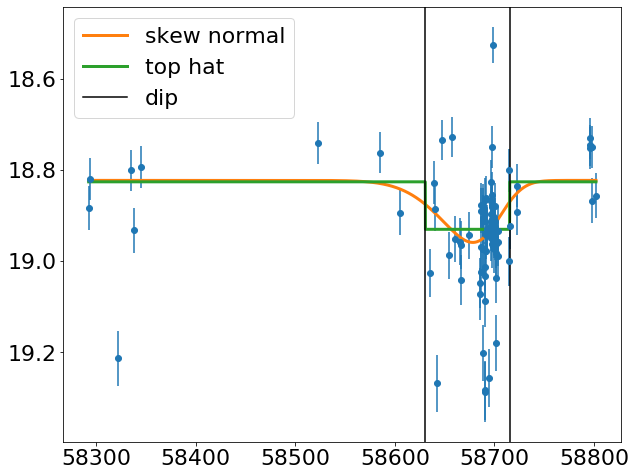


    id                             = 96482827600311052
    dip.significance               = 5.66173791885376
    model_error_in_dip_r_top_hat   = 8.533348083496094
    model_error_in_dip_r_skew_norm = 2.8878462314605713
    


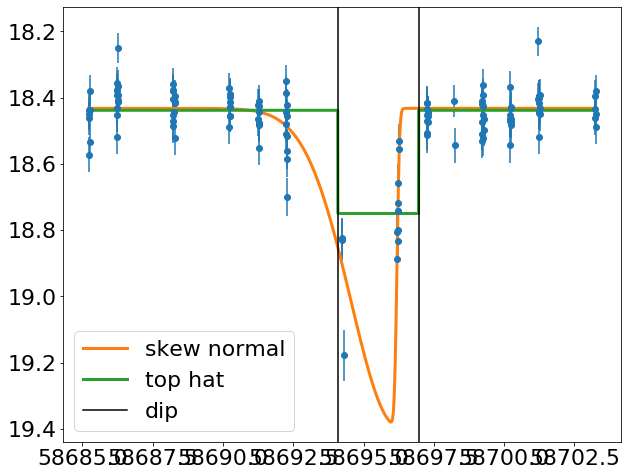


    id                             = 131782853697244909
    dip.significance               = 6.080530643463135
    model_error_in_dip_r_top_hat   = 29.357385635375977
    model_error_in_dip_r_skew_norm = 25.766536712646484
    


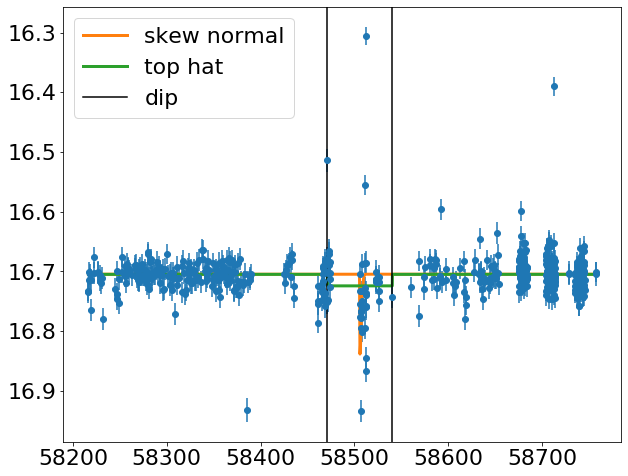


    id                             = 131782853757253741
    dip.significance               = 5.899080276489258
    model_error_in_dip_r_top_hat   = 41.24348449707031
    model_error_in_dip_r_skew_norm = 35.592594146728516
    


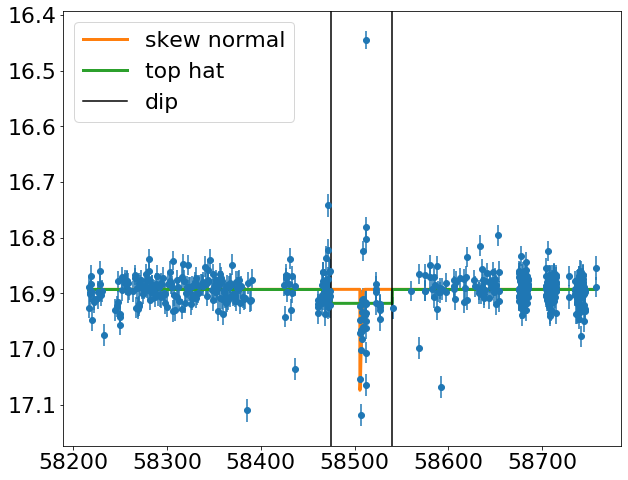


    id                             = 131792922344199762
    dip.significance               = 5.587250232696533
    model_error_in_dip_r_top_hat   = 2.1381120681762695
    model_error_in_dip_r_skew_norm = 1.2850072383880615
    


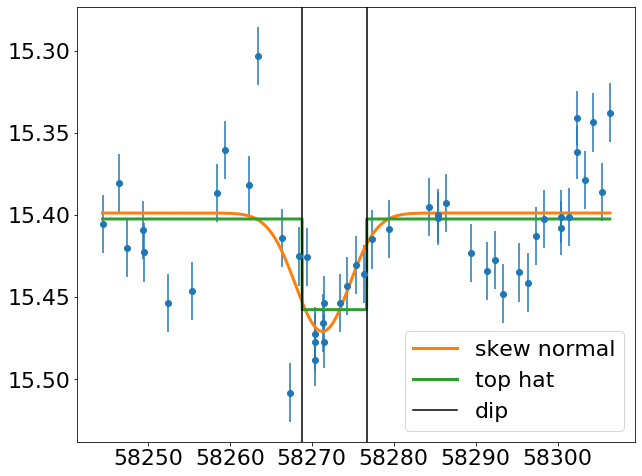


    id                             = 131782926575981564
    dip.significance               = 6.640514850616455
    model_error_in_dip_r_top_hat   = 2.563802719116211
    model_error_in_dip_r_skew_norm = 1.8600919246673584
    


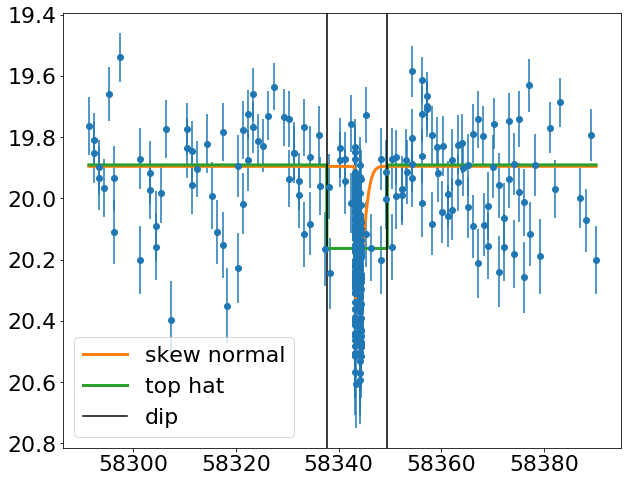


    id                             = 131792929235226540
    dip.significance               = 5.900359630584717
    model_error_in_dip_r_top_hat   = 2.960773229598999
    model_error_in_dip_r_skew_norm = 2.9212265014648438
    


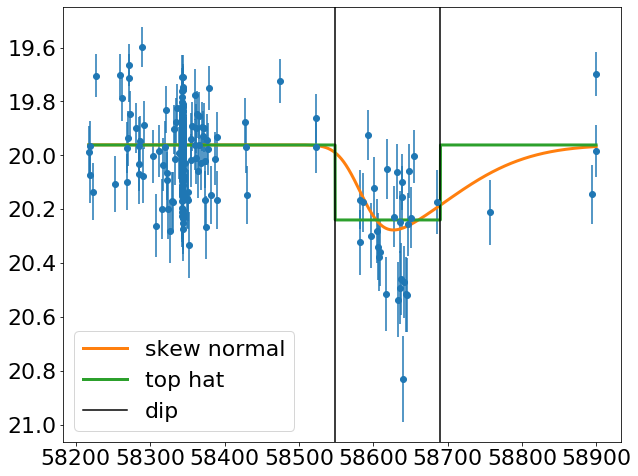


    id                             = 131802945254480889
    dip.significance               = 5.563487529754639
    model_error_in_dip_r_top_hat   = 3.5469346046447754
    model_error_in_dip_r_skew_norm = 3.0934882164001465
    


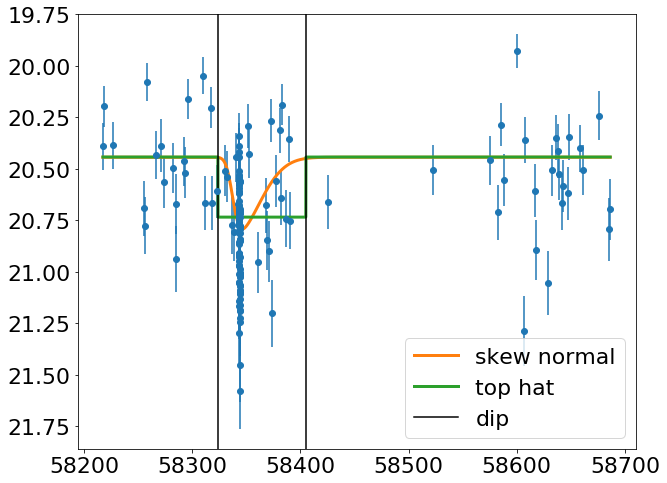


    id                             = 131792967599886640
    dip.significance               = 5.270985126495361
    model_error_in_dip_r_top_hat   = 5.2983927726745605
    model_error_in_dip_r_skew_norm = 4.4839653968811035
    


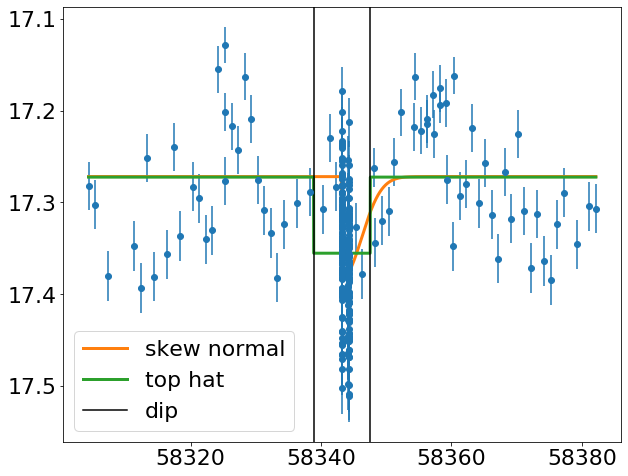


    id                             = 131782973417798399
    dip.significance               = 8.814433097839355
    model_error_in_dip_r_top_hat   = 1.2940353155136108
    model_error_in_dip_r_skew_norm = 1.2709194421768188
    


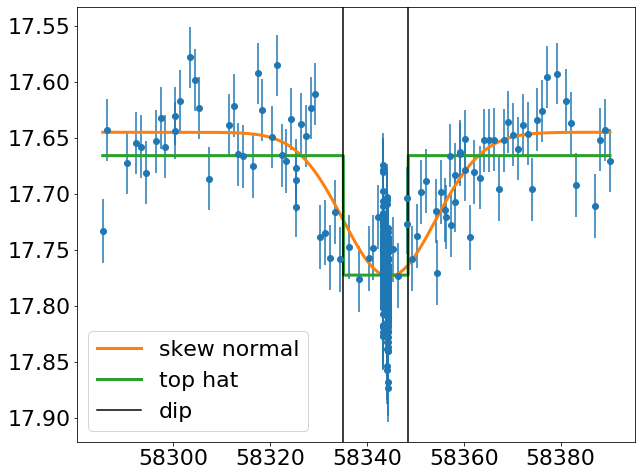


    id                             = 131793130402671124
    dip.significance               = 5.89553689956665
    model_error_in_dip_r_top_hat   = 12.680962562561035
    model_error_in_dip_r_skew_norm = 9.708481788635254
    


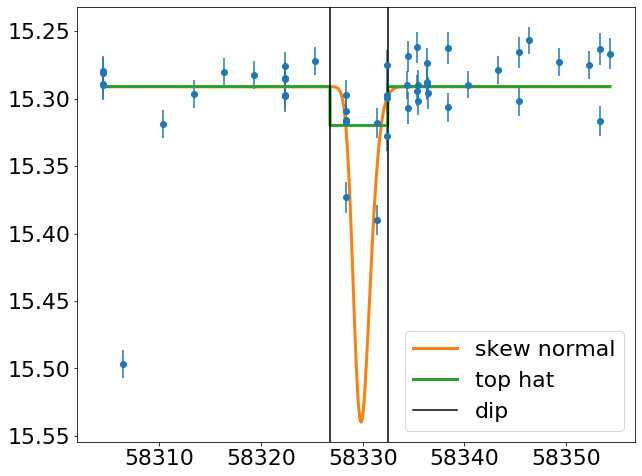


    id                             = 131793140944014936
    dip.significance               = 5.684187889099121
    model_error_in_dip_r_top_hat   = 24.441431045532227
    model_error_in_dip_r_skew_norm = 39.653663635253906
    


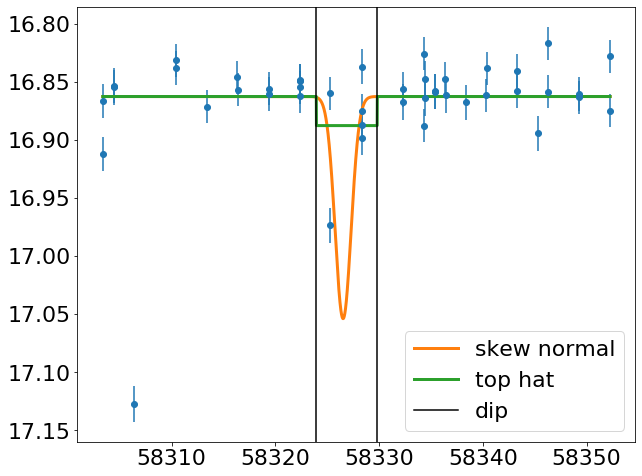


    id                             = 131783215258555778
    dip.significance               = 6.627840995788574
    model_error_in_dip_r_top_hat   = 74.82919311523438
    model_error_in_dip_r_skew_norm = 5.868195533752441
    


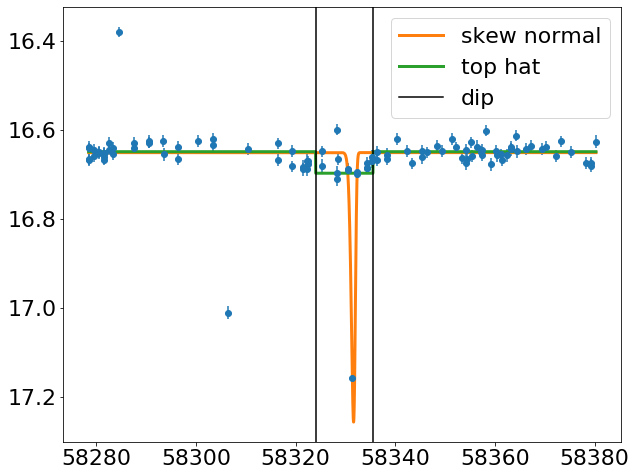


    id                             = 144500719739094080
    dip.significance               = 5.551145553588867
    model_error_in_dip_r_top_hat   = 4.151252269744873
    model_error_in_dip_r_skew_norm = 2.5216000080108643
    


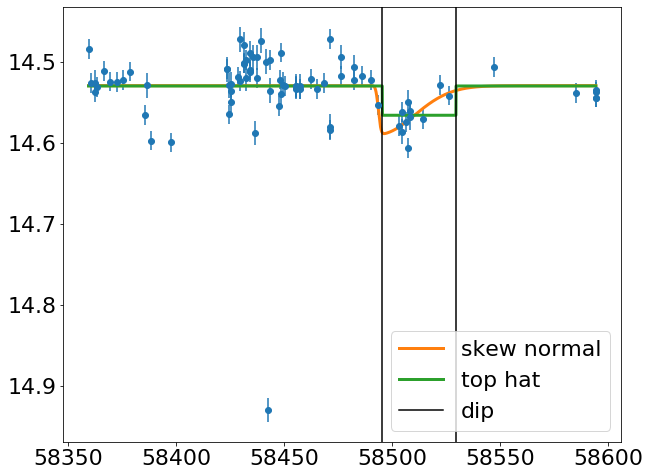


    id                             = 144500764091681099
    dip.significance               = 5.435901165008545
    model_error_in_dip_r_top_hat   = 20.28367042541504
    model_error_in_dip_r_skew_norm = inf
    


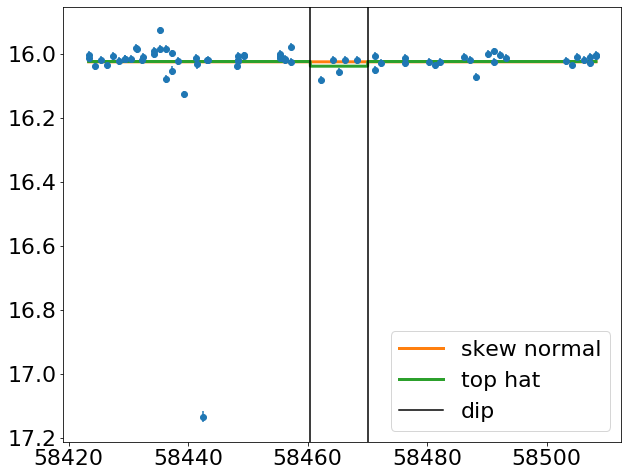


    id                             = 144510765107503967
    dip.significance               = 6.399407863616943
    model_error_in_dip_r_top_hat   = 31.547508239746094
    model_error_in_dip_r_skew_norm = inf
    


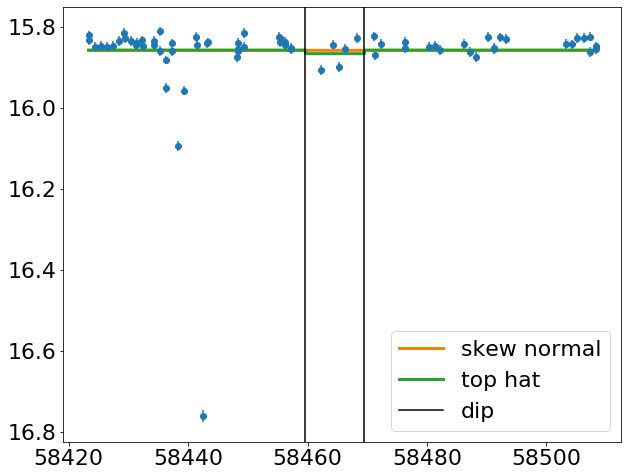


    id                             = 144520938025671956
    dip.significance               = 8.750460624694824
    model_error_in_dip_r_top_hat   = -4.64186429977417
    model_error_in_dip_r_skew_norm = -16.577835083007812
    


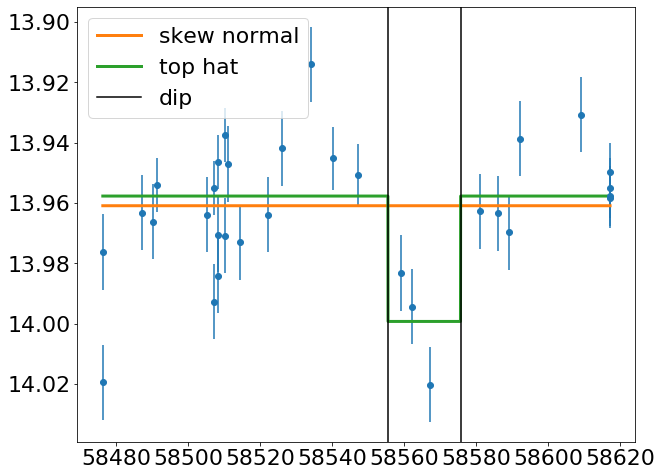


    id                             = 144500938687989999
    dip.significance               = 5.1434831619262695
    model_error_in_dip_r_top_hat   = -5.522883415222168
    model_error_in_dip_r_skew_norm = -0.05946774408221245
    


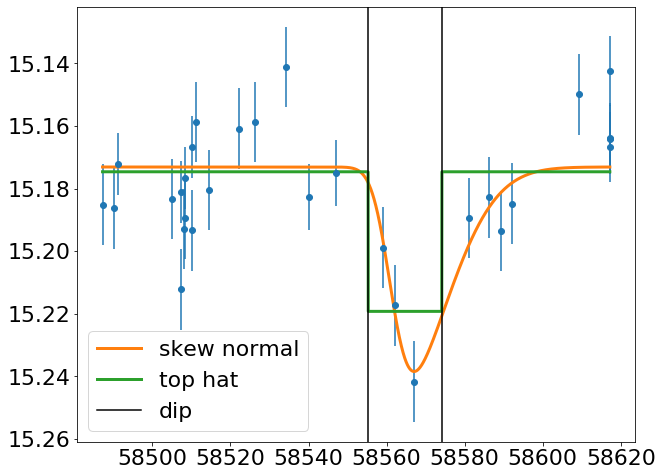

In [21]:
plt.rc("figure", figsize=[10, 8])
plt.rc("font", size=22)

nplot = 0
total = 50
for lc in lcs:
    if nplot == total:
        break
    x = lc['around_dip_window_r']['x']
    if len(x) < 10:
        continue
    nplot += 1
            
    y = lc['around_dip_window_r']['y']
    yerr = lc['around_dip_window_r']['yerr']
    
    # plot data
    plot_data(x, y, yerr)
    
    # plot skew normal model
    fit_skew_normal = lc['fit_r_skew_normal']
    plot_model(x, skew_normal, fit_skew_normal['popt'], label="skew normal", lw=3)
    
    # plot top hat
    fit_top_hat = lc['fit_r_top_hat']
    plot_model(x, top_hat, fit_top_hat['popt'], label="top hat", lw=3)

    # show extent of dip
    dip = lc['dip']
    
    plt.axvline(dip['start_mjd'], color="k", label="dip")
    plt.axvline(dip['end_mjd'], color="k")

    print("""
    id                             = {}
    dip.significance               = {}
    model_error_in_dip_r_top_hat   = {}
    model_error_in_dip_r_skew_norm = {}
    """.format(
        lc['ps1_objid'],
        dip['significance'],
        lc['model_error_in_dip_r_top_hat']['reduced_sum_square_error'],
        lc['model_error_in_dip_r_skew_normal']['reduced_sum_square_error']
    ))
    plt.legend()
    plt.gca().invert_yaxis()
    plt.show()

AnalysisException: "Reference 'zone' is ambiguous, could be: default.6_4_20_stevengs_top_hat_fits_r_band.zone, default.6_4_20_stevengs_skew_normal_fits_r_band.zone.;"